In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
sea_crime = pd.read_csv('sea_cleaned_crime.csv')
sea_licenses = pd.read_csv('sea_lic_cleaned.csv')

In [27]:
sea_crime = sea_crime.drop('Unnamed: 0',axis=1)
sea_licenses = sea_licenses.drop('Unnamed: 0',axis=1)

In [41]:
sea_crime.head()

,Primary Offense Description,Neighborhood,date_occurred,offense_category,month_year
0,BURGLARY-FORCE-RES,LAKEWOOD/SEWARD PARK,1975-12-16,burglary,1975-12
1,SEXOFF-INDECENT LIBERTIES,UNKNOWN,1976-01-01,pub disorder,1976-01
2,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK,1979-01-28,theft from vehicle,1979-01
3,HOMICIDE-PREMEDITATED-WEAPON,BRIGHTON/DUNLAP,1981-08-22,murder,1981-08
4,BURGLARY-FORCE-RES,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1981-02-14,burglary,1981-02


In [44]:
sea_crime['month_year'] = sea_crime['month_year'].astype(str)

In [45]:
sea_crime['month_year'] = sea_crime['month_year'].str[:7]

In [60]:
type(sea_crime['month_year'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
sea_crime['month_year'] = pd.to_datetime(sea_crime['month_year'], format='%Y-%m')


In [56]:
sea_crime.head()

,Primary Offense Description,Neighborhood,date_occurred,offense_category,month_year
0,BURGLARY-FORCE-RES,LAKEWOOD/SEWARD PARK,1975-12-16,burglary,1975-12-01
1,SEXOFF-INDECENT LIBERTIES,UNKNOWN,1976-01-01,pub disorder,1976-01-01
2,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK,1979-01-28,theft from vehicle,1979-01-01
3,HOMICIDE-PREMEDITATED-WEAPON,BRIGHTON/DUNLAP,1981-08-22,murder,1981-08-01
4,BURGLARY-FORCE-RES,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1981-02-14,burglary,1981-02-01


In [51]:
sea_crime['offense_category'].unique()

array(['burglary', 'pub disorder', 'theft from vehicle', 'murder',
       'auto-theft', 'larceny', 'drug-alc', 'agg assault',
       'sexual assault', 'robbery', 'arson', 'child',
       'other crimes against persons', 'other', 'white collar'],
      dtype=object)

In [52]:
sea_other = sea_crime.loc[sea_crime['offense_category'] == 'other']
sea_theft_from_mtr_veh = sea_crime.loc[sea_crime['offense_category'] == 'theft from motor vehicle']
sea_other_crimes_agnst_per = sea_crime.loc[sea_crime['offense_category'] == 'other crimes against persons']
sea_drug_alc = sea_crime.loc[sea_crime['offense_category'] == 'drug-alc']
sea_auto_theft = sea_crime.loc[sea_crime['offense_category'] == 'auto theft']
sea_white_collar = sea_crime.loc[sea_crime['offense_category'] == 'white collar']
sea_burglary = sea_crime.loc[sea_crime['offense_category'] == 'burglary']
sea_agg_assault = sea_crime.loc[sea_crime['offense_category'] == 'agg assault']
sea_pub_disorder = sea_crime.loc[sea_crime['offense_category'] == 'pub disorder']
sea_robbery = sea_crime.loc[sea_crime['offense_category'] == 'robbery']
sea_arson = sea_crime.loc[sea_crime['offense_category'] == 'arson']
sea_sex_asslt = sea_crime.loc[sea_crime['offense_category'] == 'sexual assault']
sea_murder = sea_crime.loc[sea_crime['offense_category'] == 'murder']
sea_larceny = sea_crime.loc[sea_crime['offense_category'] == 'larceny']
sea_child = sea_crime.loc[sea_crime['offense_category'] == 'child']


In [57]:
x = sea_crime['month_year'].sort_values()
x = x.unique()
x

array(['1908-12-01T00:00:00.000000000', '1964-06-01T00:00:00.000000000',
       '1973-01-01T00:00:00.000000000', '1974-06-01T00:00:00.000000000',
       '1975-01-01T00:00:00.000000000', '1975-12-01T00:00:00.000000000',
       '1976-01-01T00:00:00.000000000', '1976-07-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1978-01-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1979-07-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-08-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1985-09-01T00:00:00.000000000', '1986-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '1988-09-01T00:00:00.000000000',
       '1989-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1990-02-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1993-02-01T00:00:00.000000000',
       '1993-07-01T00:00:00.000000000', '1993-10-01

/Users/ajfong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


ValueError: x and y must have same first dimension, but have shapes (270,) and (0,)

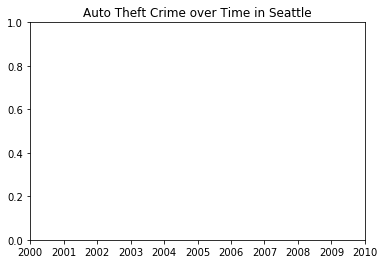

In [59]:
plt.title('Auto Theft Crime over Time in Seattle')

plt.plot(x,sea_auto_theft['month_year'].value_counts())